In [1]:
import pandas as pd
import numpy as np

In [2]:
from data_processing import clean_and_process_data

path = "API_ST.INT.ARVL_DS2_en_csv_v2_5994899.csv"

travel = clean_and_process_data(path)
travel.head()

,Country_Name,Country_Code,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,912000,957000,947000,906000,972000,1211000,1178000,1225000,...,1469000,1481000,1667000,1739000,1832000,1758000,1863000,1897000,1951000,0
1,Angola,AGO,9000,21000,45000,52000,45000,51000,67000,91000,...,481000,528000,650000,595000,592000,397000,261000,218000,218000,0
2,Albania,ALB,304000,287000,119000,184000,371000,317000,354000,470000,...,2932000,3514000,3256000,3673000,4131000,4736000,5118000,5927000,6406000,2658000
3,Andorra,AND,0,0,0,0,9422000,10991000,11351000,11507000,...,7983000,7900000,7676000,7797000,7850000,8025000,8152000,8328000,8235000,5207000
4,United Arab Emirates,ARE,0,0,0,0,0,0,0,0,...,0,0,0,0,19313000,20894000,21805000,23092000,25282000,8084000


In [3]:
travel.iloc[:,2:].head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,912000,957000,947000,906000,972000,1211000,1178000,1225000,1184000,1304000,...,1469000,1481000,1667000,1739000,1832000,1758000,1863000,1897000,1951000,0
1,9000,21000,45000,52000,45000,51000,67000,91000,107000,194000,...,481000,528000,650000,595000,592000,397000,261000,218000,218000,0
2,304000,287000,119000,184000,371000,317000,354000,470000,557000,645000,...,2932000,3514000,3256000,3673000,4131000,4736000,5118000,5927000,6406000,2658000
3,0,0,0,0,9422000,10991000,11351000,11507000,11601000,11668000,...,7983000,7900000,7676000,7797000,7850000,8025000,8152000,8328000,8235000,5207000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,19313000,20894000,21805000,23092000,25282000,8084000


In [4]:
Aruba = travel.iloc[0,:].reset_index().iloc[2:,:].reset_index(drop=True).rename(columns={"index":"Time",
                                                                                 0:"Year"})

In [5]:
Aruba.head()

,Time,Year
0,1995,912000
1,1996,957000
2,1997,947000
3,1998,906000
4,1999,972000


In [6]:
countries = travel.Country_Name.values

In [7]:
time_data = travel.T.reset_index().rename(columns={"index":"Year"}).iloc[2:,:].reset_index(drop=True)

In [8]:
time_data.head(2)

,Year,0,1,2,3,4,5,6,7,8,...,168,169,170,171,172,173,174,175,176,177
0,1995,912000,9000,304000,0,0,2289000,12000,34000,447000,...,6127000,2177000,79732000,92000,1351000,82000,0,4684000,163000,1416000
1,1996,957000,21000,287000,0,0,2614000,13000,35000,498000,...,6750000,2258000,82756000,173000,1607000,103000,0,5186000,264000,1597000


In [9]:
len(countries)

178

In [10]:
for i,column in enumerate(countries):
    time_data = time_data.rename(columns={i:column})

In [11]:
time_data.head()

,Year,Aruba,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Ukraine,Uruguay,United States,Uzbekistan,Viet Nam,Vanuatu,Samoa,South Africa,Zambia,Zimbabwe
0,1995,912000,9000,304000,0,0,2289000,12000,34000,447000,...,6127000,2177000,79732000,92000,1351000,82000,0,4684000,163000,1416000
1,1996,957000,21000,287000,0,0,2614000,13000,35000,498000,...,6750000,2258000,82756000,173000,1607000,103000,0,5186000,264000,1597000
2,1997,947000,45000,119000,0,0,2764000,23000,26000,526000,...,14743000,2463000,82525000,960000,1716000,81000,0,5170000,341000,1336000
3,1998,906000,52000,184000,0,0,3012000,32000,36000,570000,...,12003000,2324000,74767000,811000,1520000,78000,0,5898000,362000,2090000
4,1999,972000,45000,371000,9422000,0,2898000,41000,41000,560000,...,10990000,2273000,75796000,487000,1782000,96000,0,6026000,404000,2250000


In [12]:
time_data['Year'] = pd.to_datetime(time_data['Year'], format='%Y')
time_data.head()

,Year,Aruba,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Ukraine,Uruguay,United States,Uzbekistan,Viet Nam,Vanuatu,Samoa,South Africa,Zambia,Zimbabwe
0,1995-01-01,912000,9000,304000,0,0,2289000,12000,34000,447000,...,6127000,2177000,79732000,92000,1351000,82000,0,4684000,163000,1416000
1,1996-01-01,957000,21000,287000,0,0,2614000,13000,35000,498000,...,6750000,2258000,82756000,173000,1607000,103000,0,5186000,264000,1597000
2,1997-01-01,947000,45000,119000,0,0,2764000,23000,26000,526000,...,14743000,2463000,82525000,960000,1716000,81000,0,5170000,341000,1336000
3,1998-01-01,906000,52000,184000,0,0,3012000,32000,36000,570000,...,12003000,2324000,74767000,811000,1520000,78000,0,5898000,362000,2090000
4,1999-01-01,972000,45000,371000,9422000,0,2898000,41000,41000,560000,...,10990000,2273000,75796000,487000,1782000,96000,0,6026000,404000,2250000


In [13]:
time_data_numeric = time_data.drop(columns=["Year"]).apply(pd.to_numeric, errors='coerce')
result = time_data_numeric.apply(lambda x: np.sqrt(x), axis=0).round(2)
result.head()

,Aruba,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,Australia,...,Ukraine,Uruguay,United States,Uzbekistan,Viet Nam,Vanuatu,Samoa,South Africa,Zambia,Zimbabwe
0,954.99,94.87,551.36,0.00,0.0,1512.94,109.54,184.39,668.58,1930.28,...,2475.28,1475.47,8929.28,303.32,1162.33,286.36,0.0,2164.26,403.73,1189.96
1,978.26,144.91,535.72,0.00,0.0,1616.79,114.02,187.08,705.69,2040.83,...,2598.08,1502.66,9097.03,415.93,1267.68,320.94,0.0,2277.28,513.81,1263.72
2,973.14,212.13,344.96,0.00,0.0,1662.53,151.66,161.25,725.26,2077.98,...,3839.66,1569.39,9084.33,979.80,1309.96,284.60,0.0,2273.76,583.95,1155.85
3,951.84,228.04,428.95,0.00,0.0,1735.51,178.89,189.74,754.98,2041.32,...,3464.53,1524.47,8646.79,900.56,1232.88,279.28,0.0,2428.58,601.66,1445.68
4,985.90,212.13,609.10,3069.53,0.0,1702.35,202.48,202.48,748.33,2111.63,...,3315.12,1507.65,8706.09,697.85,1334.92,309.84,0.0,2454.79,635.61,1500.00


In [14]:
data = pd.concat([time_data["Year"], result],axis=1)
data.head()

,Year,Aruba,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Ukraine,Uruguay,United States,Uzbekistan,Viet Nam,Vanuatu,Samoa,South Africa,Zambia,Zimbabwe
0,1995-01-01,954.99,94.87,551.36,0.00,0.0,1512.94,109.54,184.39,668.58,...,2475.28,1475.47,8929.28,303.32,1162.33,286.36,0.0,2164.26,403.73,1189.96
1,1996-01-01,978.26,144.91,535.72,0.00,0.0,1616.79,114.02,187.08,705.69,...,2598.08,1502.66,9097.03,415.93,1267.68,320.94,0.0,2277.28,513.81,1263.72
2,1997-01-01,973.14,212.13,344.96,0.00,0.0,1662.53,151.66,161.25,725.26,...,3839.66,1569.39,9084.33,979.80,1309.96,284.60,0.0,2273.76,583.95,1155.85
3,1998-01-01,951.84,228.04,428.95,0.00,0.0,1735.51,178.89,189.74,754.98,...,3464.53,1524.47,8646.79,900.56,1232.88,279.28,0.0,2428.58,601.66,1445.68
4,1999-01-01,985.90,212.13,609.10,3069.53,0.0,1702.35,202.48,202.48,748.33,...,3315.12,1507.65,8706.09,697.85,1334.92,309.84,0.0,2454.79,635.61,1500.00


In [50]:
aruba = data.iloc[:, [0,171]]
aruba.head()

,Year,United States
0,1995-01-01,8929.28
1,1996-01-01,9097.03
2,1997-01-01,9084.33
3,1998-01-01,8646.79
4,1999-01-01,8706.09


In [51]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [57]:
ts_data = data.set_index('Year')['India']
ts_data.head()

Year
1995-01-01    1457.39
1996-01-01    1512.61
1997-01-01    1540.78
1998-01-01    1535.90
1999-01-01    1575.44
Name: India, dtype: float64

In [58]:
train_size = int(len(ts_data) * 0.8)
train, test = ts_data[:train_size], ts_data[train_size:]

In [59]:
model = ARIMA(train, order=(5, 1, 0))  # You may need to adjust the order based on your data
fit_model = model.fit()

c:\Users\cheta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\cheta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\cheta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\cheta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

In [60]:
predictions = fit_model.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')


c:\Users\cheta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


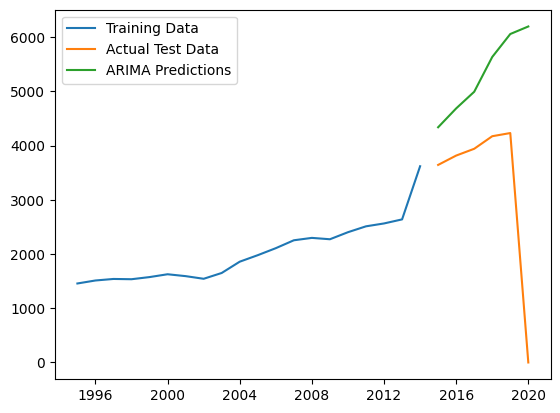

In [61]:
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, predictions, label='ARIMA Predictions')
plt.legend()
plt.show()

c:\Users\cheta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\cheta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\cheta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\cheta\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'

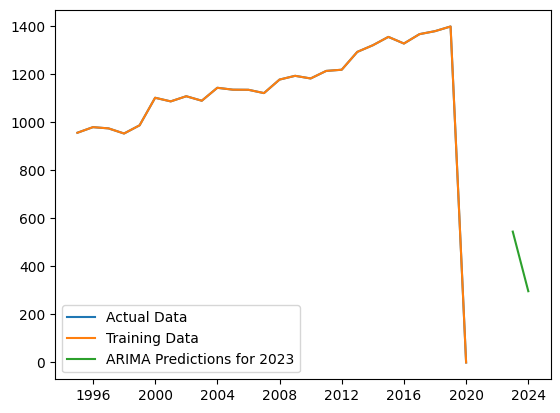

In [26]:
# Update the training set to include data up to 2020
train = ts_data[:'2020-01-01']

# Build and fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))
fit_model = model.fit()

# Make predictions for the year 2023
predictions_2023 = fit_model.predict(start='2023-01-01', end='2023-12-31', typ='levels')

# Plot the actual data, training data, and predictions
plt.plot(ts_data.index, ts_data, label='Actual Data')
plt.plot(train.index, train, label='Training Data')
plt.plot(predictions_2023.index, predictions_2023, label='ARIMA Predictions for 2023')
plt.legend()
plt.show()


In [15]:
data["Tourist_Arrivals"] = data.drop(columns=["Year"]).sum(axis=1)

In [16]:
data.head()

,Year,Aruba,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,Antigua and Barbuda,...,Uruguay,United States,Uzbekistan,Viet Nam,Vanuatu,Samoa,South Africa,Zambia,Zimbabwe,Tourist_Arrivals
0,1995-01-01,954.99,94.87,551.36,0.00,0.0,1512.94,109.54,184.39,668.58,...,1475.47,8929.28,303.32,1162.33,286.36,0.0,2164.26,403.73,1189.96,211150.05
1,1996-01-01,978.26,144.91,535.72,0.00,0.0,1616.79,114.02,187.08,705.69,...,1502.66,9097.03,415.93,1267.68,320.94,0.0,2277.28,513.81,1263.72,229059.13
2,1997-01-01,973.14,212.13,344.96,0.00,0.0,1662.53,151.66,161.25,725.26,...,1569.39,9084.33,979.80,1309.96,284.60,0.0,2273.76,583.95,1155.85,235766.13
3,1998-01-01,951.84,228.04,428.95,0.00,0.0,1735.51,178.89,189.74,754.98,...,1524.47,8646.79,900.56,1232.88,279.28,0.0,2428.58,601.66,1445.68,226148.08
4,1999-01-01,985.90,212.13,609.10,3069.53,0.0,1702.35,202.48,202.48,748.33,...,1507.65,8706.09,697.85,1334.92,309.84,0.0,2454.79,635.61,1500.00,233383.72


In [17]:
data.iloc[:,[0,-1]]

,Year,Tourist_Arrivals
0,1995-01-01,211150.05
1,1996-01-01,229059.13
2,1997-01-01,235766.13
3,1998-01-01,226148.08
4,1999-01-01,233383.72
5,2000-01-01,242552.14
6,2001-01-01,243125.94
7,2002-01-01,245933.79
8,2003-01-01,256029.83
9,2004-01-01,279030.42
